<a href="https://colab.research.google.com/github/khangdong-tech/AI-detection/blob/main/Using_YOLOv8_to_detect_some_objects_in_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

100%|██████████| 49.7M/49.7M [00:00<00:00, 135MB/s]


Saving test.mp4 to test.mp4



0: 384x640 14 persons, 2 cars, 1 traffic light, 2 handbags, 3 potted plants, 1209.4ms
Speed: 20.6ms preprocess, 1209.4ms inference, 33.8ms postprocess per image at shape (1, 3, 384, 640)


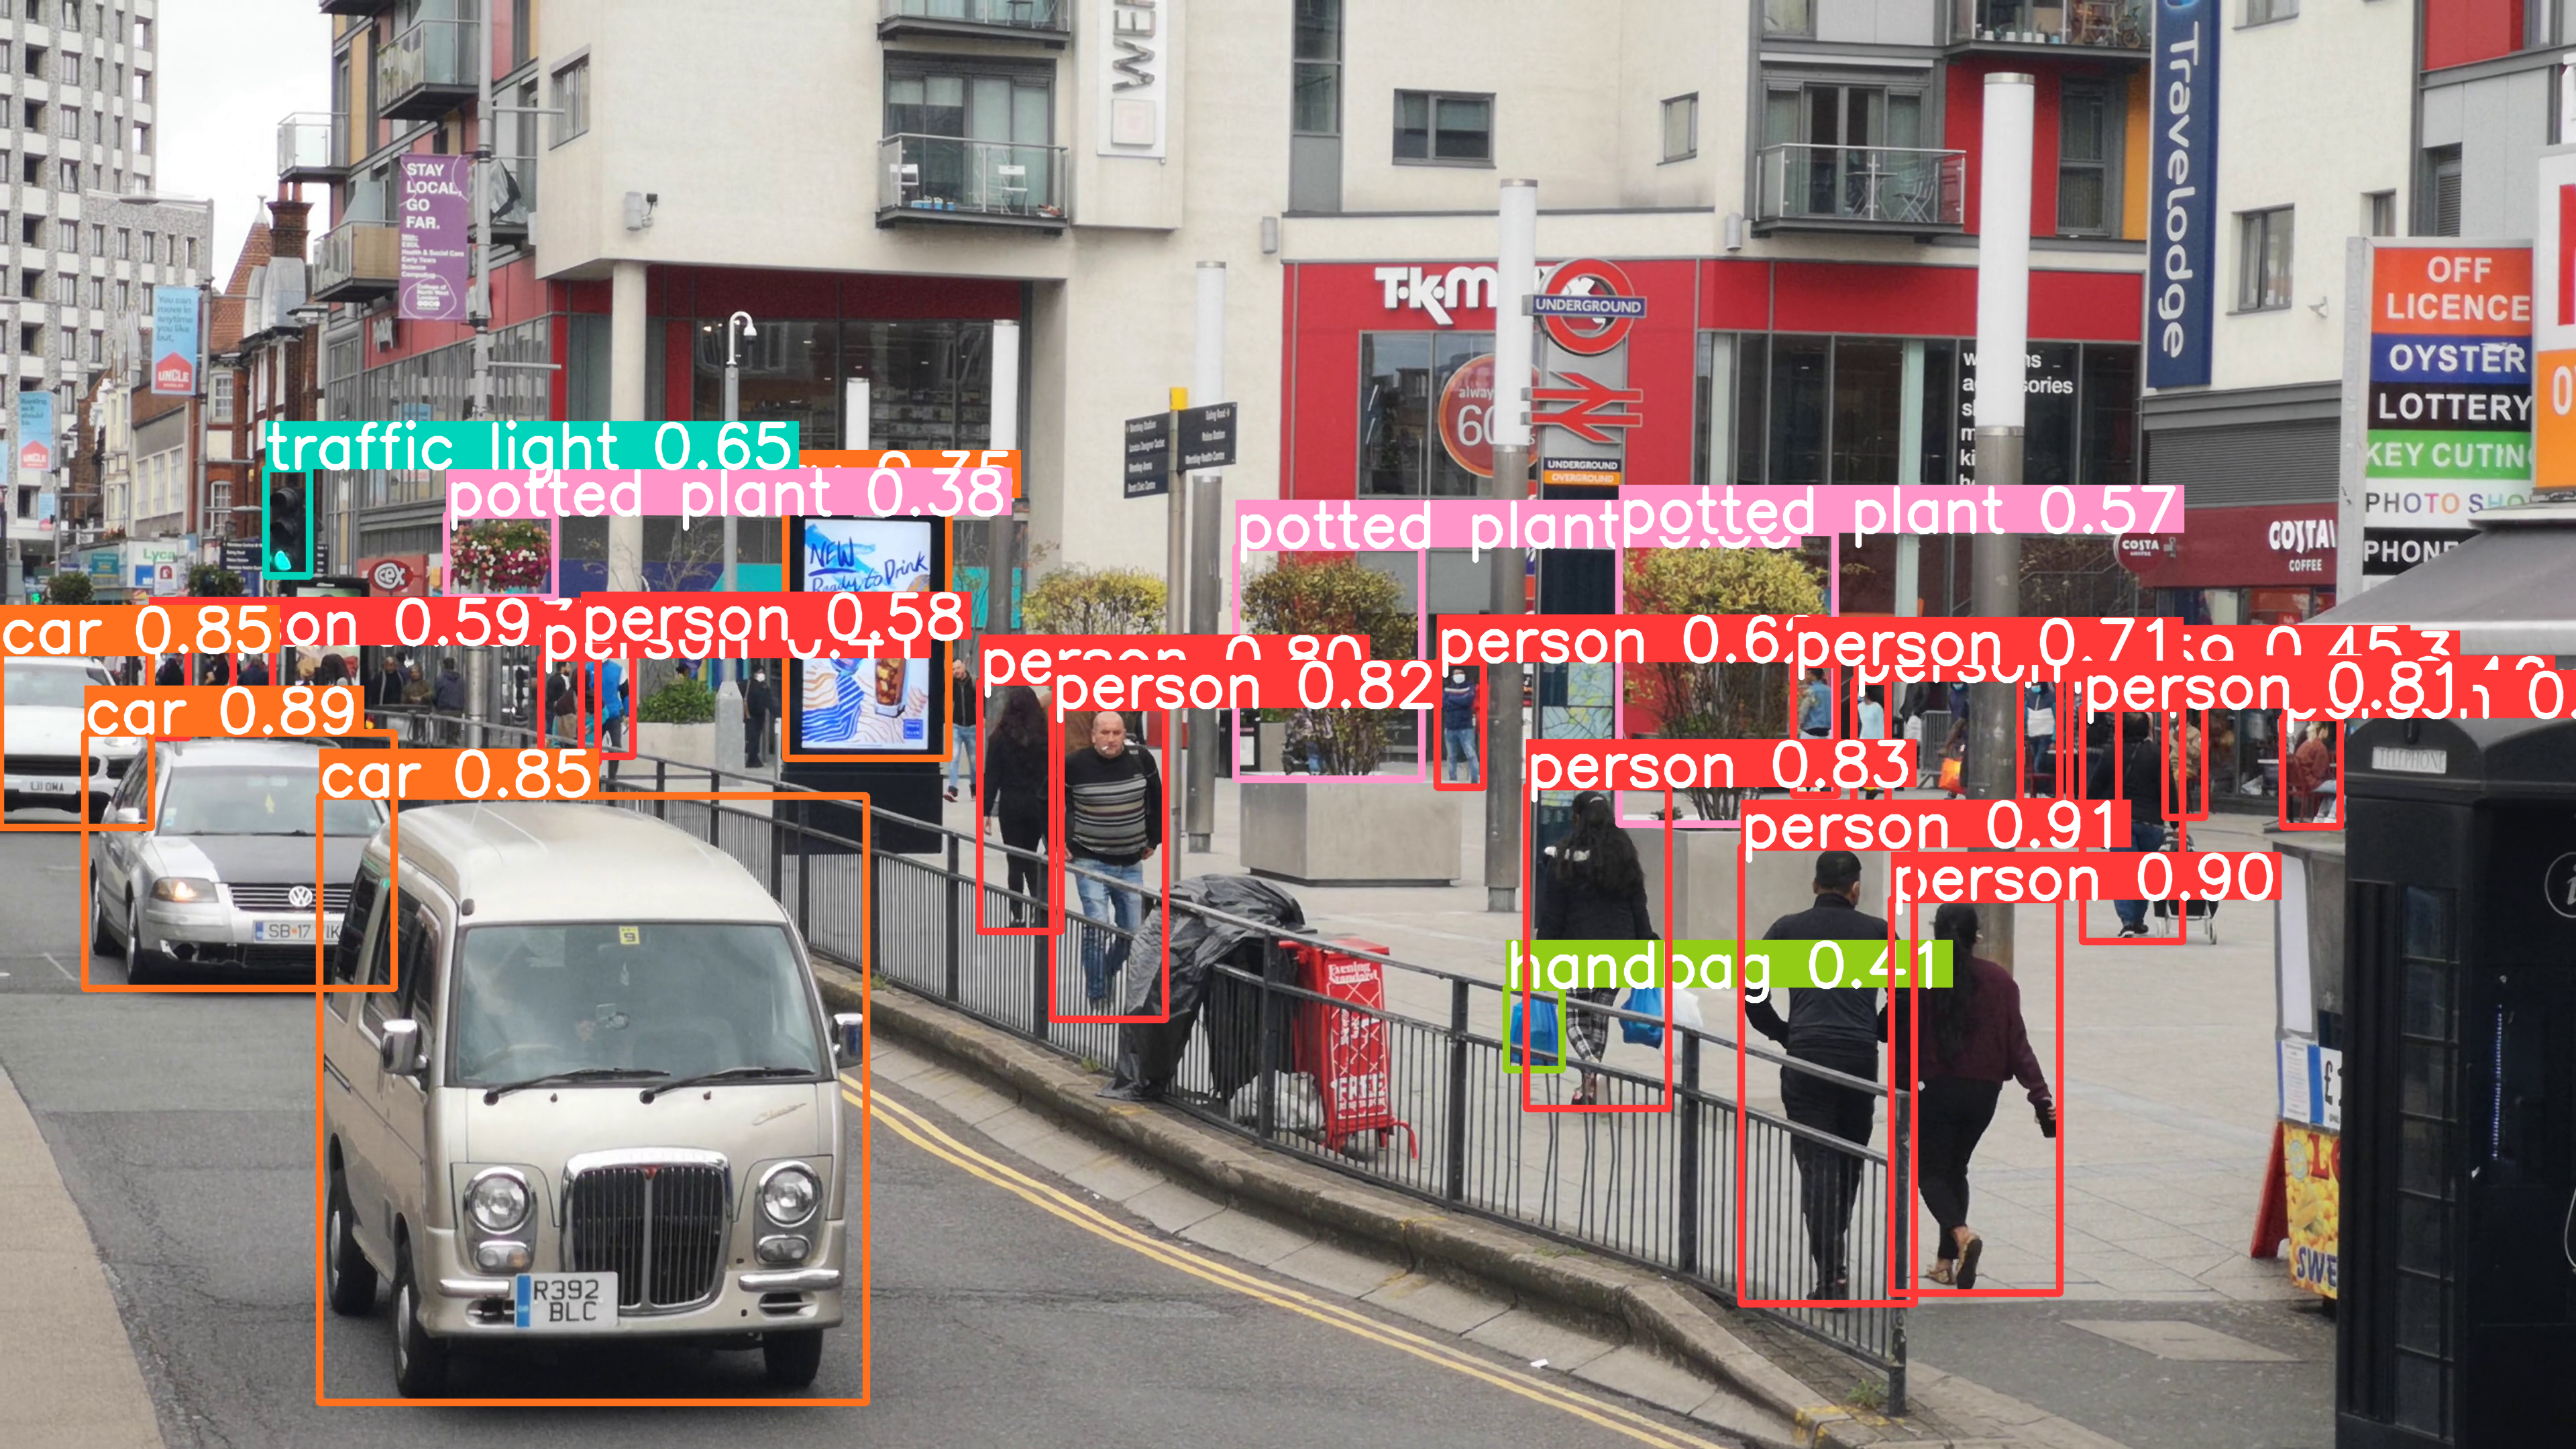


0: 384x640 14 persons, 2 cars, 1 traffic light, 2 handbags, 3 potted plants, 1303.8ms
Speed: 4.1ms preprocess, 1303.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 2 cars, 1 traffic light, 2 handbags, 3 potted plants, 1398.7ms
Speed: 3.9ms preprocess, 1398.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 2 cars, 1 traffic light, 2 handbags, 3 potted plants, 1305.5ms
Speed: 5.3ms preprocess, 1305.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 2 cars, 1 traffic light, 2 handbags, 3 potted plants, 1275.4ms
Speed: 4.0ms preprocess, 1275.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 2 cars, 1 traffic light, 2 handbags, 3 potted plants, 1423.1ms
Speed: 4.4ms preprocess, 1423.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 2 cars, 1 traffic light, 2 handbags, 3 potted 

KeyboardInterrupt: 

In [ ]:
from google.colab import files
from PIL import Image, ImageDraw
from io import BytesIO
import cv2
import numpy as np

# Install Ultralytics

# Import YOLO from Ultralytics
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8m.pt")

def perform_object_detection_on_frame(frame):
    # Perform object detection
    results = model.predict(frame, conf=0.35)
    result = results[0]

    # Convert the result to an OpenCV format
    result_cv2 = np.array(result.plot()[:, :, ::-1])

    return result_cv2

# Allow file upload
uploaded = files.upload()

# Process each uploaded file
for file_name, content in uploaded.items():
    # Check if the file is an image or a video
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        # Convert the content to an image
        image = Image.open(BytesIO(content))

        # Perform object detection on the uploaded image
        result_frame = perform_object_detection_on_frame(np.array(image))

        # Display the image with bounding boxes
        image_with_boxes = Image.fromarray(result_frame)
        display(image_with_boxes)

    elif file_name.lower().endswith(('.mp4', '.avi', '.mkv')):
        # Convert the content to a video file
        video_path = f"/content/{file_name}"
        with open(video_path, 'wb') as f:
            f.write(content)

        # Open the video file
        cap = cv2.VideoCapture(video_path)

        # Get video properties
        width = int(cap.get(3))
        height = int(cap.get(4))

        # Create VideoWriter for the output video
        output_path = f"/content/output.avi"
        out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))  # Adjust parameters as needed

        # Process each frame of the video
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Perform object detection on the frame
            result_frame = perform_object_detection_on_frame(frame)

            # Write the frame to the output video
            out.write(result_frame)

            # Display the frame with bounding boxes
            frame_with_boxes = Image.fromarray(result_frame)
            display(frame_with_boxes, display_id='frame_with_boxes')

        # Release resources
        cap.release()
        out.release()

        # Display the output video for download
        files.download(output_path)